# Heart Disease Prediction - Classification Project

## Comparing Multiple Machine Learning Algorithms

**Objective:** Apply and compare 7 different classification algorithms on the Heart Disease dataset to predict whether a patient has heart disease.

### What is Classification?

Classification is a type of **supervised learning** where we predict a **categorical outcome** (discrete classes) rather than a continuous value. In our case:

- **Input (X):** Patient features (age, blood pressure, cholesterol, etc.)
- **Output (y):** Binary class (0 = No Heart Disease, 1 = Heart Disease)

### Why Compare Multiple Algorithms?

Different algorithms make different assumptions about the data:
- **Logistic Regression** assumes a linear decision boundary
- **KNN** assumes similar points are close together
- **SVM** finds the maximum margin separator
- **Tree-based models** learn hierarchical rules

No single algorithm is "best" for all problems. By comparing them, we find what works best for **our specific dataset**.

---

## Table of Contents

1. [Import Libraries](#1-import-libraries)
2. [Load and Explore Data](#2-load-and-explore-data)
3. [Data Preprocessing](#3-data-preprocessing)
4. [Model Training & Evaluation](#4-model-training--evaluation)
   - 4.1 Logistic Regression
   - 4.2 K-Nearest Neighbors
   - 4.3 Support Vector Machine
   - 4.4 Decision Tree
   - 4.5 Random Forest
   - 4.6 Gradient Boosting
   - 4.7 XGBoost
5. [Model Comparison](#5-model-comparison)
6. [Best Model Hyperparameter Tuning](#6-best-model-hyperparameter-tuning)
7. [Final Evaluation & Conclusions](#7-final-evaluation--conclusions)

---
## 1. Import Libraries

### Why Do We Need These Libraries?

| Library | Purpose |
|---------|----------|
| **NumPy** | Numerical computations (arrays, matrices, math operations) |
| **Pandas** | Data manipulation (loading CSV, handling tables) |
| **Matplotlib & Seaborn** | Visualization (charts, plots, heatmaps) |
| **Scikit-learn** | Machine learning algorithms, preprocessing, evaluation metrics |
| **XGBoost** | Advanced gradient boosting (often wins Kaggle competitions) |

### Why Suppress Warnings?
Some libraries produce deprecation warnings that clutter our output. We suppress them for cleaner notebooks, but in production, you might want to see them.

In [36]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### Installing XGBoost

XGBoost (eXtreme Gradient Boosting) is not part of scikit-learn. It's a separate library that implements an optimized version of gradient boosting. If it's not installed, the code below will install it automatically.

In [37]:
# Install XGBoost if not already installed
try:
    from xgboost import XGBClassifier
    print("XGBoost imported successfully!")
except ImportError:
    print("Installing XGBoost...")
    !pip install xgboost
    from xgboost import XGBClassifier
    print("XGBoost installed and imported!")

XGBoost imported successfully!


---
## 2. Load and Explore Data

### Why Explore Data First?

Before building models, we need to understand our data:

1. **Shape**: How many samples and features do we have?
2. **Types**: Are features numerical or categorical?
3. **Quality**: Are there missing values or duplicates?
4. **Distribution**: Is the target balanced or imbalanced?
5. **Relationships**: Which features correlate with the target?

This step is called **Exploratory Data Analysis (EDA)** and is crucial for:
- Identifying data quality issues
- Understanding feature importance
- Guiding preprocessing decisions

In [38]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display first few rows
print(f"Dataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print()
df.head(10)

Dataset Shape: (1025, 14)
Number of samples: 1025
Number of features: 13



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### Understanding `.info()` Output

The `.info()` method tells us:
- **Data types** (int64, float64, object)
- **Non-null counts** (helps identify missing values)
- **Memory usage**

For machine learning, we prefer numerical data types. Categorical data needs encoding.

In [39]:
# Dataset Info
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Understanding `.describe()` Output

The `.describe()` method gives us statistical summary:

| Statistic | What It Tells Us |
|-----------|------------------|
| **count** | Number of non-null values |
| **mean** | Average value: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$ |
| **std** | Standard deviation (spread): $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}$ |
| **min/max** | Range of values |
| **25%, 50%, 75%** | Quartiles (25th, 50th, 75th percentile) |

**What to look for:**
- Large differences between mean and median (50%) suggest skewed data
- Large standard deviation relative to mean suggests high variability
- Min/max can reveal outliers

In [40]:
# Statistical Summary
print("=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)
df.describe().T

STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Checking for Missing Values

**Why is this important?**

Most ML algorithms cannot handle missing values (NaN/null). We have three options:

1. **Remove rows** with missing values (if few missing)
2. **Impute** (fill in) with mean, median, or mode
3. **Use algorithms** that handle missing values (like XGBoost)

Luckily, our dataset has no missing values!

In [41]:
# Check for missing values
print("=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.any() else "No missing values found!")

MISSING VALUES
No missing values found!


### Checking for Duplicates

**Why remove duplicates?**

Duplicate rows can:
- **Bias the model** toward those samples
- **Inflate performance** if the same sample appears in train and test sets
- **Waste computation** on redundant data

We remove them to ensure each sample is unique.

In [42]:
# Check for duplicates
print("=" * 50)
print("DUPLICATE ROWS")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

DUPLICATE ROWS
Number of duplicate rows: 723
Duplicates removed. New shape: (302, 14)


### 2.1 Understanding the Features

This is the **Heart Disease UCI dataset**. Each row represents a patient, and the features are clinical measurements.

| Feature | Description | Type |
|---------|-------------|------|
| **age** | Age in years | Continuous |
| **sex** | Sex (1 = male, 0 = female) | Binary |
| **cp** | Chest pain type (0-3) | Categorical |
| **trestbps** | Resting blood pressure (mm Hg) | Continuous |
| **chol** | Serum cholesterol (mg/dl) | Continuous |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Binary |
| **restecg** | Resting ECG results (0, 1, 2) | Categorical |
| **thalach** | Maximum heart rate achieved | Continuous |
| **exang** | Exercise induced angina (1 = yes, 0 = no) | Binary |
| **oldpeak** | ST depression induced by exercise | Continuous |
| **slope** | Slope of peak exercise ST segment (0-2) | Categorical |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | Ordinal |
| **thal** | Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect) | Categorical |
| **target** | **Heart disease (0 = No, 1 = Yes)** | **Binary (Target)** |

### Clinical Context

- **ST depression (oldpeak)**: Changes in the electrocardiogram during exercise; higher values may indicate heart problems
- **Thalassemia (thal)**: A blood disorder affecting hemoglobin production
- **Angina (exang)**: Chest pain caused by reduced blood flow to the heart

### Target Variable Distribution

**Why is this important?**

If the target is **imbalanced** (e.g., 95% No Disease, 5% Disease), models might just predict the majority class and still achieve high accuracy!

For example, if 95% of samples are "No Disease", a model that always predicts "No Disease" gets 95% accuracy but is useless.

**What to look for:**
- Balanced: ~50-50 split (ideal)
- Slightly imbalanced: 60-40 to 70-30 (manageable)
- Highly imbalanced: 90-10 or worse (needs special techniques)

TARGET DISTRIBUTION
target
1    164
0    138
Name: count, dtype: int64

Percentage with heart disease: 54.30%
Percentage without heart disease: 45.70%


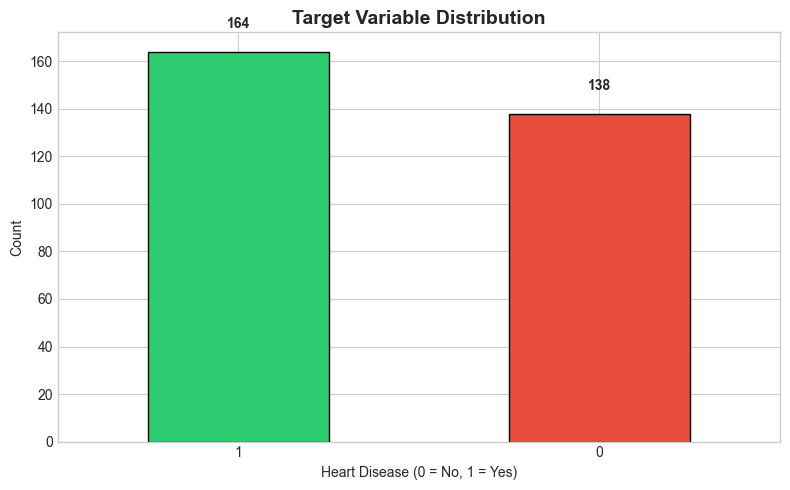

In [43]:
# Target variable distribution
print("=" * 50)
print("TARGET DISTRIBUTION")
print("=" * 50)
target_counts = df['target'].value_counts()
print(target_counts)
print()
print(f"Percentage with heart disease: {target_counts[1] / len(df) * 100:.2f}%")
print(f"Percentage without heart disease: {target_counts[0] / len(df) * 100:.2f}%")

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
target_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(target_counts):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

### 2.2 Exploratory Data Analysis (EDA)

#### Distribution of Numerical Features

We plot **histograms** to see:
1. **Shape of distribution** (normal, skewed, bimodal)
2. **Differences between classes** (colored by target)
3. **Potential outliers** (extreme values)

**What to look for:**
- If the two classes (Disease/No Disease) have clearly separated distributions, that feature is likely **very predictive**
- If they overlap completely, that feature may not be useful

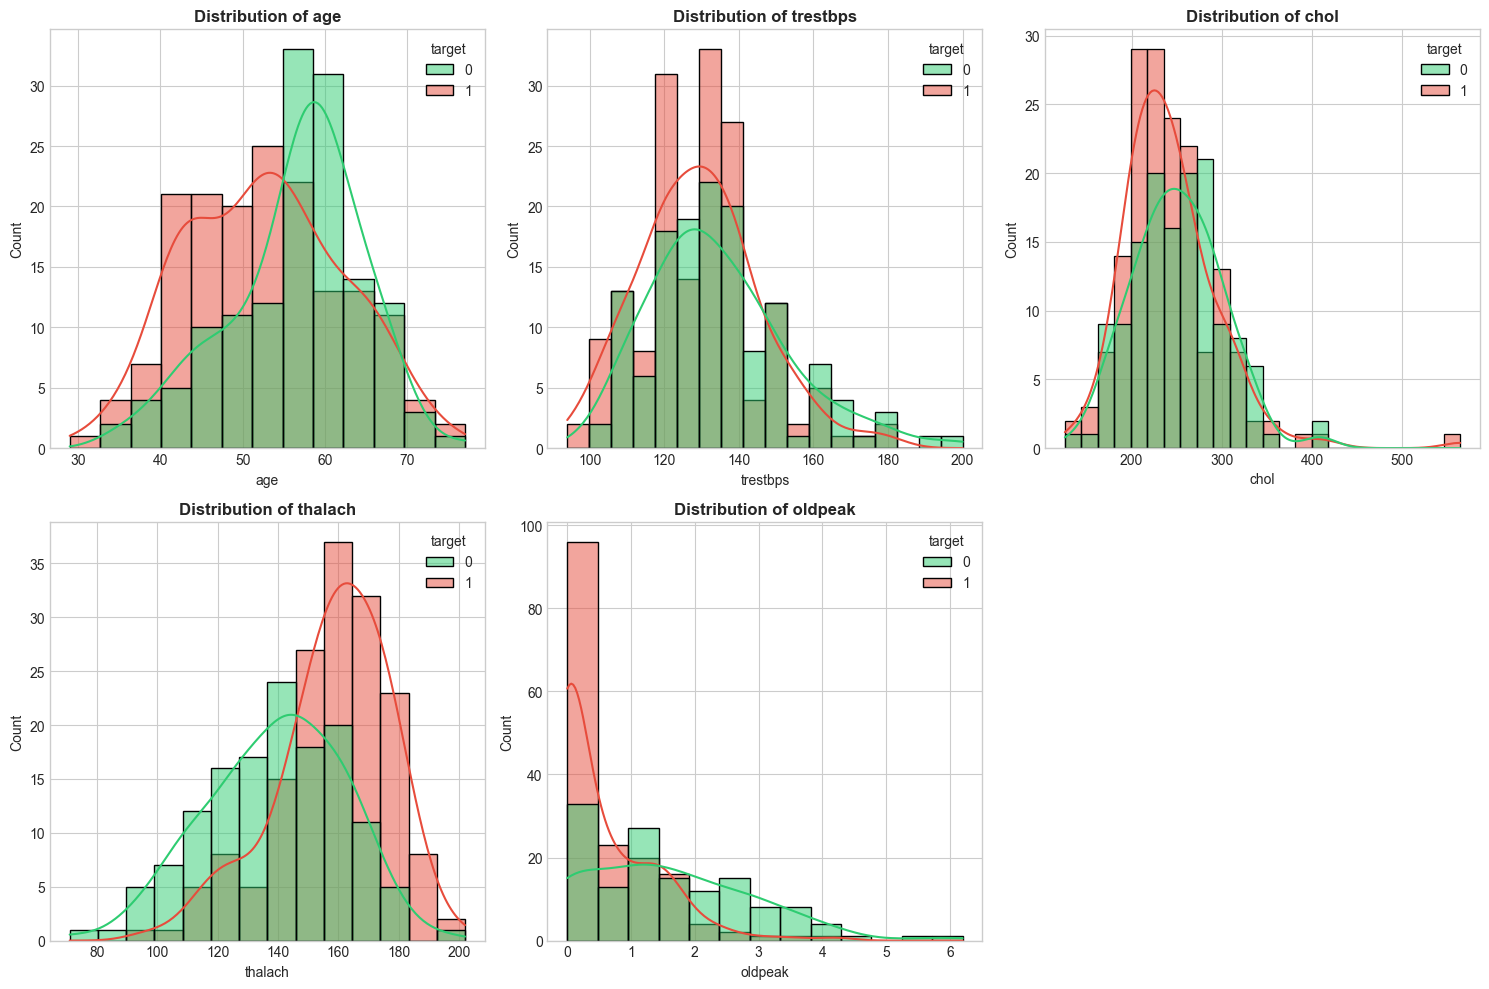

In [44]:
# Distribution of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='target', kde=True, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')

# Remove empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

#### Correlation Heatmap

**What is Correlation?**

Correlation measures the **linear relationship** between two variables. It ranges from -1 to +1:

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

| Value | Interpretation |
|-------|----------------|
| **+1** | Perfect positive correlation (as X increases, Y increases) |
| **0** | No linear correlation |
| **-1** | Perfect negative correlation (as X increases, Y decreases) |

**Why check correlations?**
1. **Multicollinearity**: Highly correlated features (>0.8) may cause issues for some algorithms
2. **Feature selection**: Features with high correlation to target are likely predictive
3. **Redundancy**: If two features are highly correlated, we might drop one

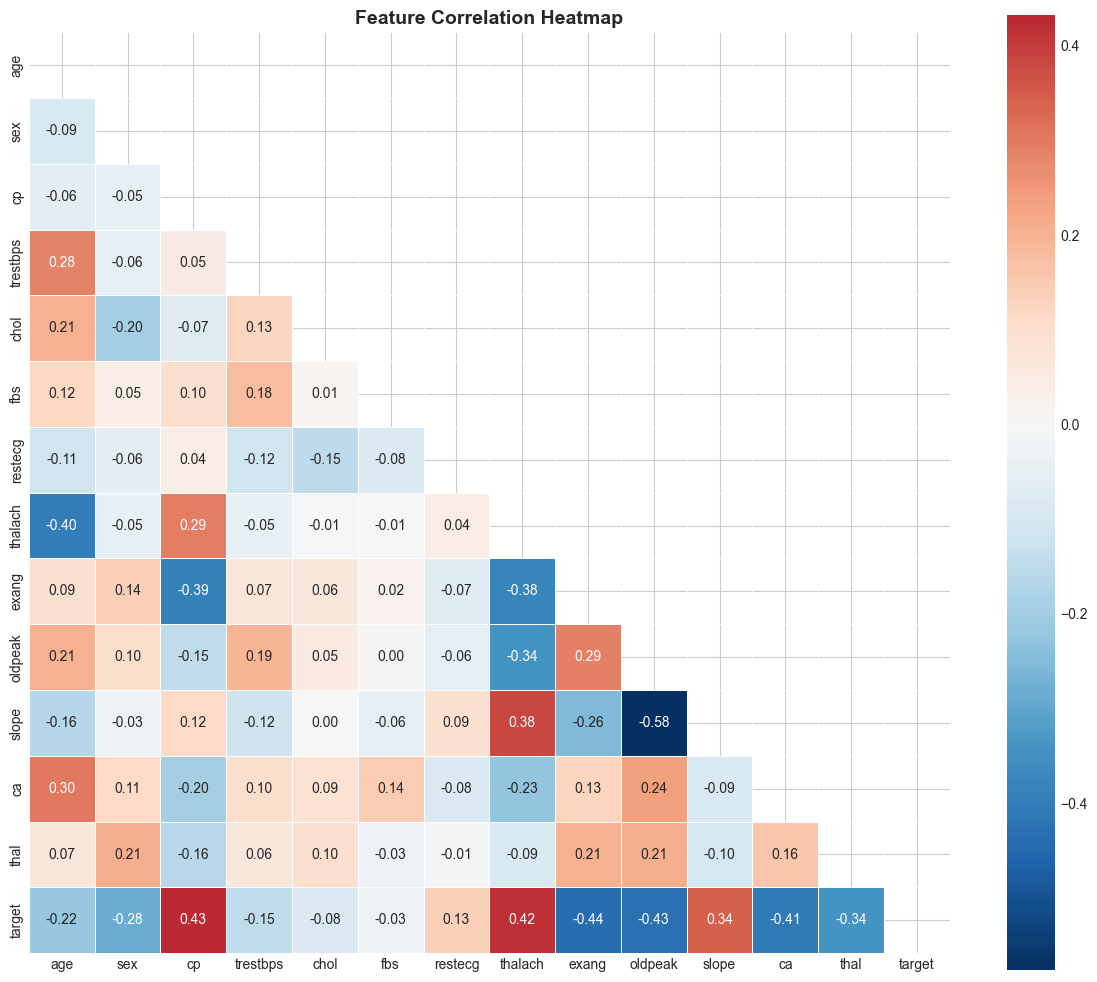

In [45]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            mask=mask, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Correlation with Target

This shows which features have the strongest relationship with heart disease:

- **Positive correlation**: Higher values → Higher chance of heart disease
- **Negative correlation**: Higher values → Lower chance of heart disease

Features with high absolute correlation (|r| > 0.3) are likely to be important predictors.

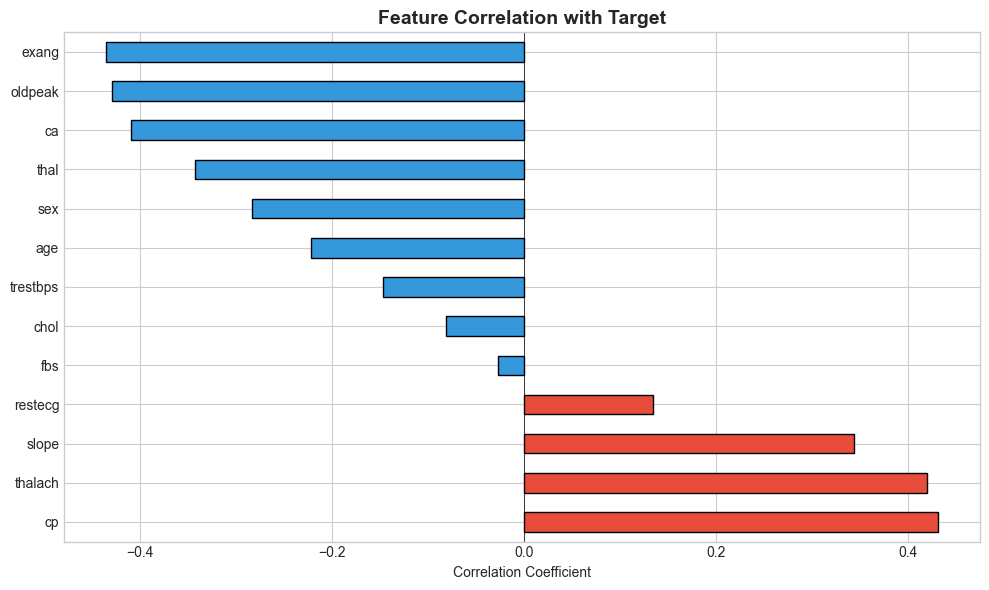

In [46]:
# Correlation with target
target_correlation = df.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_correlation]
target_correlation.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Feature Correlation with Target', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

---
## 3. Data Preprocessing

### Why Preprocess Data?

Raw data rarely works well with ML algorithms. Preprocessing ensures:

1. **Proper format** for algorithms to consume
2. **Fair comparison** between features on different scales
3. **Unbiased evaluation** through proper train/test splits

### Step 1: Separate Features (X) and Target (y)

- **X (Features)**: The input variables we use to make predictions
- **y (Target)**: The output variable we want to predict

This separation is fundamental to supervised learning:

$$\text{Model}: X \rightarrow y$$

In [47]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {list(X.columns)}")

Features shape: (302, 13)
Target shape: (302,)

Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


### Step 2: Train-Test Split

**Why split the data?**

We need to evaluate how well our model **generalizes** to unseen data. If we train and test on the same data, we can't know if the model truly learned or just memorized.

$$\text{Full Dataset} = \text{Training Set (80\%)} + \text{Test Set (20\%)}$$

| Set | Purpose |
|-----|----------|
| **Training Set** | Used to train/fit the model |
| **Test Set** | Used to evaluate performance (model never sees this during training) |

**Key parameters:**
- `test_size=0.2`: 20% of data for testing, 80% for training
- `random_state=42`: Ensures reproducibility (same split every time)
- `stratify=y`: Maintains the same class ratio in both train and test sets

**What is Stratification?**

If original data has 55% Disease and 45% No Disease, stratification ensures both train and test have this same 55-45 ratio. Without it, we might accidentally get 70-30 in test, which would bias our evaluation.

In [48]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTest set target distribution:")
print(y_test.value_counts())

Training set size: 241
Test set size: 61

Training set target distribution:
target
1    131
0    110
Name: count, dtype: int64

Test set target distribution:
target
1    33
0    28
Name: count, dtype: int64


### Step 3: Feature Scaling (Standardization)

**Why scale features?**

Different features have different scales:
- Age: 29 to 77 years
- Cholesterol: 126 to 564 mg/dl
- Oldpeak: 0 to 6.2

Some algorithms (KNN, SVM, Logistic Regression) use **distance calculations** or **gradient descent**. Without scaling:
- Features with larger values dominate distance calculations
- Gradient descent converges slowly

**StandardScaler Formula:**

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $x$ = original value
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation of the feature
- $z$ = standardized value (now has mean=0, std=1)

**Example:**
- Original cholesterol = 246 mg/dl
- Mean cholesterol = 251 mg/dl
- Std cholesterol = 52 mg/dl
- Standardized = (246 - 251) / 52 = -0.096

**Important:** We `fit_transform` on training data and only `transform` on test data. Why?
- We learn the mean and std from training data only
- Using test data statistics would be **data leakage** (cheating!)

**Which algorithms need scaling?**
| Needs Scaling | Doesn't Need Scaling |
|---------------|----------------------|
| Logistic Regression | Decision Tree |
| KNN | Random Forest |
| SVM | Gradient Boosting |
| Neural Networks | XGBoost |

In [49]:
# Feature Scaling
# Important for: Logistic Regression, KNN, SVM
# Not required for: Decision Tree, Random Forest, Gradient Boosting, XGBoost

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test_scaled = scaler.transform(X_test)        # Only transform test (use train's mean/std)

print("Feature scaling completed!")
print(f"\nScaled training data - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")

Feature scaling completed!

Scaled training data - Mean: -0.000000, Std: 1.000000


---
## 4. Model Training & Evaluation

### Evaluation Metrics Explained

#### Confusion Matrix

A 2x2 table showing prediction results:

|  | Predicted: No Disease | Predicted: Disease |
|--|----------------------|--------------------|
| **Actual: No Disease** | True Negative (TN) | False Positive (FP) |
| **Actual: Disease** | False Negative (FN) | True Positive (TP) |

- **True Positive (TP)**: Correctly predicted Disease
- **True Negative (TN)**: Correctly predicted No Disease
- **False Positive (FP)**: Predicted Disease, but actually No Disease (Type I Error)
- **False Negative (FN)**: Predicted No Disease, but actually Disease (Type II Error)

#### Metrics Formulas

**Accuracy**: Overall correctness
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Precision**: Of all positive predictions, how many were correct?
$$\text{Precision} = \frac{TP}{TP + FP}$$

*"When we predict Disease, how often are we right?"*

**Recall (Sensitivity)**: Of all actual positives, how many did we catch?
$$\text{Recall} = \frac{TP}{TP + FN}$$

*"Of all patients with Disease, how many did we identify?"*

**F1-Score**: Harmonic mean of Precision and Recall
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

*Balances precision and recall - useful when you care about both*

**ROC-AUC**: Area under the ROC curve (0.5 = random, 1.0 = perfect)
- Measures ability to distinguish between classes at various thresholds

#### Which Metric to Use?

| Scenario | Preferred Metric |
|----------|------------------|
| Balanced classes, equal error costs | Accuracy |
| Imbalanced classes | F1-Score, ROC-AUC |
| Missing a positive is costly (e.g., cancer diagnosis) | Recall |
| False alarms are costly (e.g., spam filter) | Precision |

In [50]:
# Helper function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a classification model.
    Returns a dictionary of metrics.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Print results
    print("=" * 60)
    print(f"MODEL: {model_name}")
    print("=" * 60)
    print(f"\nTest Set Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:   {roc_auc:.4f}")
    print(f"\nCross-Validation (5-fold):")
    print(f"  Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {model_name}', fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

In [51]:
# Store results for comparison
results = []

---
### 4.1 Logistic Regression

#### What is Logistic Regression?

Despite its name, Logistic Regression is a **classification** algorithm (not regression!). It predicts the **probability** that a sample belongs to a class.

#### The Math Behind It

**Step 1: Linear Combination**

First, we compute a weighted sum of features (like linear regression):

$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n = \mathbf{w}^T \mathbf{x} + b$$

Where:
- $\beta_i$ (or $w_i$) = learned weights for each feature
- $x_i$ = feature values
- $z$ = can be any real number (-∞ to +∞)

**Step 2: Sigmoid Function**

We need a probability (0 to 1), so we pass $z$ through the **sigmoid function**:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

This "squashes" any real number into the range (0, 1):
- When $z \rightarrow +\infty$, $\sigma(z) \rightarrow 1$
- When $z \rightarrow -\infty$, $\sigma(z) \rightarrow 0$
- When $z = 0$, $\sigma(z) = 0.5$

**Step 3: Prediction**

$$P(y=1|x) = \sigma(\mathbf{w}^T \mathbf{x} + b)$$

If $P(y=1|x) > 0.5$, predict class 1 (Disease); otherwise, predict class 0 (No Disease).

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| Fast training and prediction | Assumes linear decision boundary |
| Outputs probabilities | May underfit complex patterns |
| Interpretable coefficients | Sensitive to outliers |
| Works well with many features | Requires feature scaling |

MODEL: Logistic Regression

Test Set Metrics:
  Accuracy:  0.8033
  Precision: 0.8000
  Recall:    0.8485
  F1-Score:  0.8235
  ROC-AUC:   0.8712

Cross-Validation (5-fold):
  Mean Accuracy: 0.8216 (+/- 0.0420)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.75      0.78        28
     Disease       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



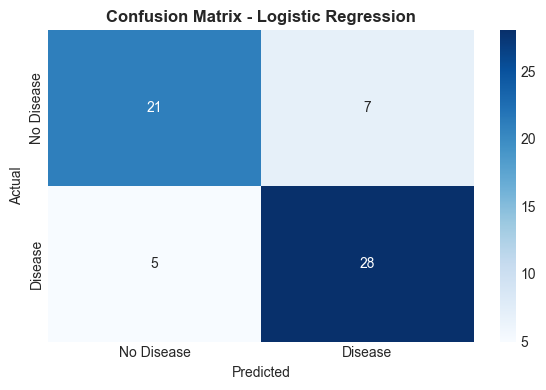

In [52]:
# Logistic Regression (uses scaled data)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression')
results.append(lr_results)

---
### 4.2 K-Nearest Neighbors (KNN)

#### What is KNN?

KNN is one of the simplest ML algorithms. It makes predictions based on the **K closest training samples** to a new point.

#### How It Works

1. Choose a value for K (number of neighbors)
2. For a new point, find the K nearest training points
3. Let those K neighbors "vote" - the majority class wins

#### Distance Calculation (Euclidean Distance)

$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$

For 2D: $d = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$

#### Example with K=3

```
New patient: [age=55, chol=240]
Nearest 3 neighbors:
  - Patient A (distance=2.1): Disease
  - Patient B (distance=3.5): No Disease
  - Patient C (distance=4.2): Disease

Vote: 2 Disease, 1 No Disease → Predict: Disease
```

#### Choosing K

| K Value | Effect |
|---------|--------|
| **Small K (e.g., 1-3)** | More sensitive to noise, may overfit |
| **Large K (e.g., 15-21)** | Smoother boundaries, may underfit |
| **Rule of thumb** | $K = \sqrt{n}$ where n = number of samples |

#### Why KNN Needs Scaling

Without scaling:
- Cholesterol (126-564) would dominate over Age (29-77)
- Distance would be mostly determined by cholesterol

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| Simple to understand | Slow prediction (must compute all distances) |
| No training phase | Memory intensive (stores all data) |
| Can learn complex boundaries | Sensitive to irrelevant features |
| Works well with enough data | Curse of dimensionality |

MODEL: K-Nearest Neighbors

Test Set Metrics:
  Accuracy:  0.7869
  Precision: 0.7778
  Recall:    0.8485
  F1-Score:  0.8116
  ROC-AUC:   0.8377

Cross-Validation (5-fold):
  Mean Accuracy: 0.8093 (+/- 0.0791)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.71      0.75        28
     Disease       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



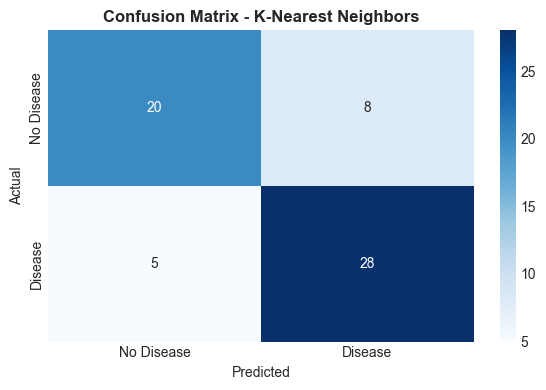

In [53]:
# K-Nearest Neighbors (uses scaled data)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 'K-Nearest Neighbors')
results.append(knn_results)

---
### 4.3 Support Vector Machine (SVM)

#### What is SVM?

SVM finds the **optimal hyperplane** that separates classes with the **maximum margin**.

#### Key Concepts

**Hyperplane**: A decision boundary that separates classes
- In 2D: a line
- In 3D: a plane
- In nD: a hyperplane

**Margin**: The distance between the hyperplane and the nearest data points from each class

**Support Vectors**: The data points closest to the hyperplane (they "support" it)

#### The Math

**Decision function:**
$$f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b$$

**Prediction:**
- If $f(\mathbf{x}) > 0$: Class 1
- If $f(\mathbf{x}) < 0$: Class 0

**Optimization Objective:**
$$\min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||^2 \quad \text{subject to} \quad y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1$$

This maximizes the margin (= $\frac{2}{||\mathbf{w}||}$).

#### The Kernel Trick

What if data isn't linearly separable? We use **kernels** to map data to higher dimensions where it becomes separable!

**Common Kernels:**

| Kernel | Formula | Use Case |
|--------|---------|----------|
| **Linear** | $K(x,y) = x^T y$ | Linearly separable data |
| **RBF (Gaussian)** | $K(x,y) = e^{-\gamma||x-y||^2}$ | Most common, works well generally |
| **Polynomial** | $K(x,y) = (\gamma x^T y + r)^d$ | Polynomial decision boundaries |

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| Effective in high dimensions | Slow with large datasets |
| Works well with clear margins | Sensitive to feature scaling |
| Kernel trick for non-linear data | Less interpretable |
| Memory efficient (only stores SVs) | Choosing right kernel/params is tricky |

MODEL: Support Vector Machine

Test Set Metrics:
  Accuracy:  0.7705
  Precision: 0.7714
  Recall:    0.8182
  F1-Score:  0.7941
  ROC-AUC:   0.8420

Cross-Validation (5-fold):
  Mean Accuracy: 0.8132 (+/- 0.0655)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.77      0.71      0.74        28
     Disease       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



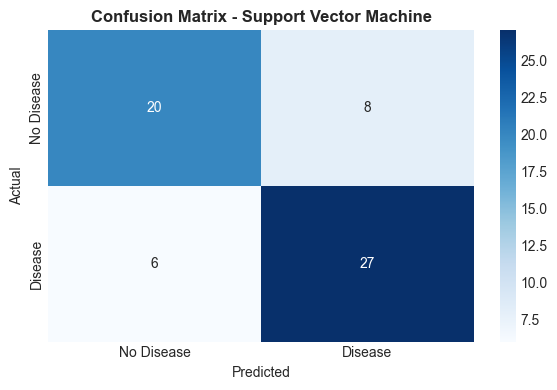

In [54]:
# Support Vector Machine (uses scaled data)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_results = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Support Vector Machine')
results.append(svm_results)

---
### 4.4 Decision Tree

#### What is a Decision Tree?

A Decision Tree learns a series of **if-then-else rules** to split data into pure groups. It's like a flowchart!

```
                    [Is thalach > 140?]
                    /              \
                  Yes               No
                  /                   \
        [Is cp > 1?]              [Is oldpeak > 1.5?]
          /    \                      /       \
        Yes    No                   Yes        No
        /        \                  /           \
    Disease   No Disease      No Disease      Disease
```

#### How It Splits: Gini Impurity

The tree chooses splits that create the "purest" groups. **Gini Impurity** measures how mixed a group is:

$$\text{Gini} = 1 - \sum_{i=1}^{C} p_i^2$$

Where $p_i$ = proportion of class $i$ in the node.

**Examples:**
- Pure node (all Disease): Gini = $1 - 1^2 = 0$ (perfect!)
- Mixed node (50% each): Gini = $1 - (0.5^2 + 0.5^2) = 0.5$ (worst)
- Slightly mixed (70-30): Gini = $1 - (0.7^2 + 0.3^2) = 0.42$

#### Alternative: Information Gain (Entropy)

$$\text{Entropy} = -\sum_{i=1}^{C} p_i \log_2(p_i)$$

$$\text{Information Gain} = \text{Entropy}_{\text{parent}} - \sum \frac{n_{\text{child}}}{n_{\text{parent}}} \times \text{Entropy}_{\text{child}}$$

#### Key Parameters

| Parameter | Purpose |
|-----------|----------|
| `max_depth` | Maximum tree depth (prevents overfitting) |
| `min_samples_split` | Minimum samples to split a node |
| `min_samples_leaf` | Minimum samples in a leaf node |

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| Easy to interpret and visualize | Prone to overfitting |
| Handles both numerical and categorical | Unstable (small data changes → different tree) |
| No feature scaling needed | Biased toward features with more levels |
| Captures non-linear relationships | Can create overly complex trees |

MODEL: Decision Tree

Test Set Metrics:
  Accuracy:  0.7705
  Precision: 0.8065
  Recall:    0.7576
  F1-Score:  0.7812
  ROC-AUC:   0.8317

Cross-Validation (5-fold):
  Mean Accuracy: 0.7678 (+/- 0.0984)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.73      0.79      0.76        28
     Disease       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



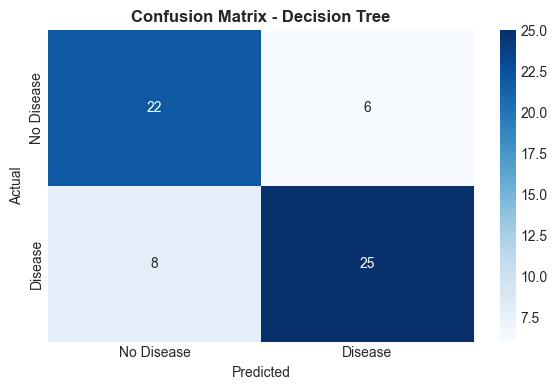

In [55]:
# Decision Tree (does NOT need scaled data)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')
results.append(dt_results)

---
### 4.5 Random Forest

#### What is Random Forest?

Random Forest is an **ensemble method** that builds many Decision Trees and combines their predictions. It's called "random" because:

1. **Bootstrap sampling**: Each tree is trained on a random subset of data (with replacement)
2. **Feature randomness**: Each split considers only a random subset of features

#### How It Works

$$\text{Final Prediction} = \text{Mode}(\text{Tree}_1, \text{Tree}_2, ..., \text{Tree}_n)$$

```
       Data
      / | \ 
   Bootstrap Samples
    /   |   \
Tree1 Tree2 Tree3 ... Tree_n
  |     |     |
  v     v     v
 Pred1 Pred2 Pred3
        \
         → Majority Vote → Final Prediction
```

#### Why Does This Work?

**Wisdom of the crowd!** Individual trees may make mistakes, but:
- Different trees make different mistakes
- Errors tend to cancel out when we average
- The ensemble is more robust than any single tree

**Mathematically:**
- Single tree error = $\epsilon$
- Ensemble error ≈ $\frac{\epsilon}{\sqrt{n}}$ (if trees are independent)

#### Key Parameters

| Parameter | Purpose | Typical Values |
|-----------|---------|----------------|
| `n_estimators` | Number of trees | 100-500 |
| `max_depth` | Max depth per tree | 10-30 or None |
| `max_features` | Features per split | 'sqrt' or 'log2' |
| `min_samples_split` | Min samples to split | 2-10 |

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| Reduces overfitting vs single tree | Less interpretable than single tree |
| Handles high-dimensional data well | Slower training than single tree |
| Built-in feature importance | Memory intensive |
| Robust to outliers and noise | Can overfit noisy data |

MODEL: Random Forest

Test Set Metrics:
  Accuracy:  0.7541
  Precision: 0.7647
  Recall:    0.7879
  F1-Score:  0.7761
  ROC-AUC:   0.8615

Cross-Validation (5-fold):
  Mean Accuracy: 0.8132 (+/- 0.0599)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.74      0.71      0.73        28
     Disease       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



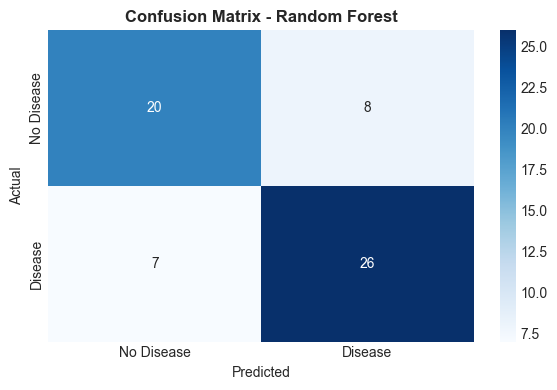

In [56]:
# Random Forest (does NOT need scaled data)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')
results.append(rf_results)

---
### 4.6 Gradient Boosting

#### What is Gradient Boosting?

Gradient Boosting is another ensemble method, but instead of building trees **in parallel** (like Random Forest), it builds them **sequentially**. Each new tree tries to correct the errors of the previous trees.

#### The Key Insight

```
Model_1: Makes predictions → Has errors (residuals)
    ↓
Model_2: Trained to predict the ERRORS of Model_1
    ↓
Model_3: Trained to predict the ERRORS of Model_1 + Model_2
    ↓
...
Final = Model_1 + Model_2 + Model_3 + ...
```

#### The Math

**Objective:** Minimize a loss function $L(y, F(x))$

For classification with log-loss:
$$L(y, F) = -[y \log(p) + (1-y) \log(1-p)]$$

**Update rule:**
$$F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)$$

Where:
- $F_m(x)$ = model after m iterations
- $\eta$ = learning rate (shrinkage)
- $h_m(x)$ = new tree fitted to negative gradients (residuals)

**Gradient:**
$$h_m \text{ is fitted to } -\frac{\partial L}{\partial F_{m-1}(x_i)}$$

This is why it's called "Gradient" Boosting - we use gradient descent in function space!

#### Key Parameters

| Parameter | Purpose | Effect |
|-----------|---------|--------|
| `n_estimators` | Number of trees | More = better fit, but slower |
| `learning_rate` | Step size (η) | Lower = more robust, needs more trees |
| `max_depth` | Tree depth | Usually small (3-5) |
| `subsample` | Data fraction per tree | <1.0 reduces overfitting |

**Important trade-off:** `learning_rate` × `n_estimators` ≈ constant for similar performance

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| Often achieves best accuracy | Slow training (sequential) |
| Handles complex patterns | Prone to overfitting without tuning |
| Works well with mixed feature types | Many hyperparameters to tune |
| Feature importance available | Sensitive to noisy data |

MODEL: Gradient Boosting

Test Set Metrics:
  Accuracy:  0.7213
  Precision: 0.7353
  Recall:    0.7576
  F1-Score:  0.7463
  ROC-AUC:   0.8258

Cross-Validation (5-fold):
  Mean Accuracy: 0.7844 (+/- 0.0658)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.70      0.68      0.69        28
     Disease       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



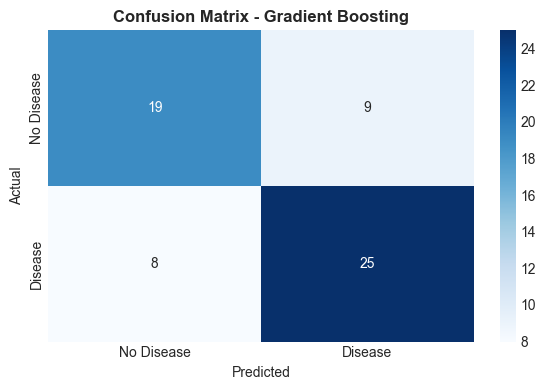

In [57]:
# Gradient Boosting (does NOT need scaled data)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_results = evaluate_model(gb_model, X_train, X_test, y_train, y_test, 'Gradient Boosting')
results.append(gb_results)

---
### 4.7 XGBoost

#### What is XGBoost?

XGBoost (eXtreme Gradient Boosting) is an **optimized implementation** of gradient boosting. It's famous for winning many Kaggle competitions!

#### What Makes XGBoost Special?

**1. Regularization**

XGBoost adds L1 and L2 regularization to prevent overfitting:

$$\text{Objective} = \sum_{i} L(y_i, \hat{y}_i) + \sum_{k} \Omega(f_k)$$

$$\Omega(f) = \gamma T + \frac{1}{2}\lambda ||w||^2$$

Where:
- $T$ = number of leaves
- $w$ = leaf weights
- $\gamma$ = L1 regularization (penalty for more leaves)
- $\lambda$ = L2 regularization (penalty for large weights)

**2. Second-Order Approximation**

Uses both first and second derivatives (Hessian) for better optimization:

$$L^{(t)} \approx \sum_{i}[g_i f_t(x_i) + \frac{1}{2}h_i f_t^2(x_i)] + \Omega(f_t)$$

Where:
- $g_i = \frac{\partial L}{\partial \hat{y}^{(t-1)}}$ (gradient)
- $h_i = \frac{\partial^2 L}{\partial (\hat{y}^{(t-1)})^2}$ (Hessian)

**3. Sparsity-Aware Split Finding**
- Efficiently handles missing values
- Learns optimal direction for missing values

**4. Parallel Processing**
- Parallelizes tree construction
- Much faster than scikit-learn's GradientBoosting

#### Key Parameters

| Parameter | Purpose | Typical Values |
|-----------|---------|----------------|
| `n_estimators` | Number of trees | 100-1000 |
| `learning_rate` | Step size | 0.01-0.3 |
| `max_depth` | Tree depth | 3-10 |
| `subsample` | Row sampling | 0.5-1.0 |
| `colsample_bytree` | Column sampling | 0.5-1.0 |
| `reg_alpha` | L1 regularization | 0-1 |
| `reg_lambda` | L2 regularization | 1 (default) |

#### Strengths & Weaknesses

| Strengths | Weaknesses |
|-----------|------------|
| State-of-the-art performance | Many hyperparameters |
| Built-in regularization | Requires careful tuning |
| Handles missing values | Can still overfit |
| Fast and scalable | Less interpretable |

MODEL: XGBoost

Test Set Metrics:
  Accuracy:  0.7213
  Precision: 0.7500
  Recall:    0.7273
  F1-Score:  0.7385
  ROC-AUC:   0.8496

Cross-Validation (5-fold):
  Mean Accuracy: 0.8008 (+/- 0.0683)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.69      0.71      0.70        28
     Disease       0.75      0.73      0.74        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



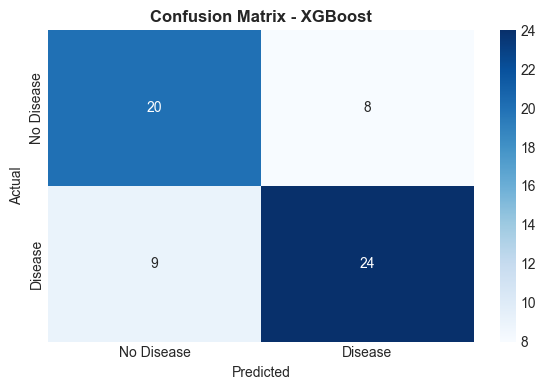

In [58]:
# XGBoost (does NOT need scaled data)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_results = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, 'XGBoost')
results.append(xgb_results)

---
## 5. Model Comparison

Now let's compare all models side by side to see which performs best!

### Why Use Multiple Metrics?

Different metrics tell different stories:

| Metric | Best For |
|--------|----------|
| **Accuracy** | Balanced classes, when all errors are equally bad |
| **Precision** | When false positives are costly (spam filter) |
| **Recall** | When false negatives are costly (disease detection) |
| **F1-Score** | Balance between precision and recall |
| **ROC-AUC** | Overall ranking ability across all thresholds |

For medical diagnosis (our case), **Recall** is often more important - we don't want to miss patients with heart disease!

In [59]:
# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("=" * 80)
print("MODEL COMPARISON - SORTED BY F1-SCORE")
print("=" * 80)
results_df

MODEL COMPARISON - SORTED BY F1-SCORE


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Mean,CV Std
0,Logistic Regression,0.803279,0.800000,0.848485,0.823529,0.871212,0.821599,0.020999
1,K-Nearest Neighbors,0.786885,0.777778,0.848485,0.811594,0.837662,0.809269,0.039564
2,Support Vector Machine,0.770492,0.771429,0.818182,0.794118,0.841991,0.813180,0.032739
3,Decision Tree,0.770492,0.806452,0.757576,0.781250,0.831710,0.767772,0.049214
4,Random Forest,0.754098,0.764706,0.787879,0.776119,0.861472,0.813180,0.029971
5,Gradient Boosting,0.721311,0.735294,0.757576,0.746269,0.825758,0.784354,0.032893
6,XGBoost,0.721311,0.750000,0.727273,0.738462,0.849567,0.800765,0.034166


### Visual Comparison

Visualizations make it easier to compare models at a glance. We'll create:
1. **Accuracy comparison** - Overall correctness
2. **F1-Score comparison** - Balanced precision/recall
3. **ROC-AUC comparison** - Ranking ability
4. **Cross-validation comparison** - Stability across folds

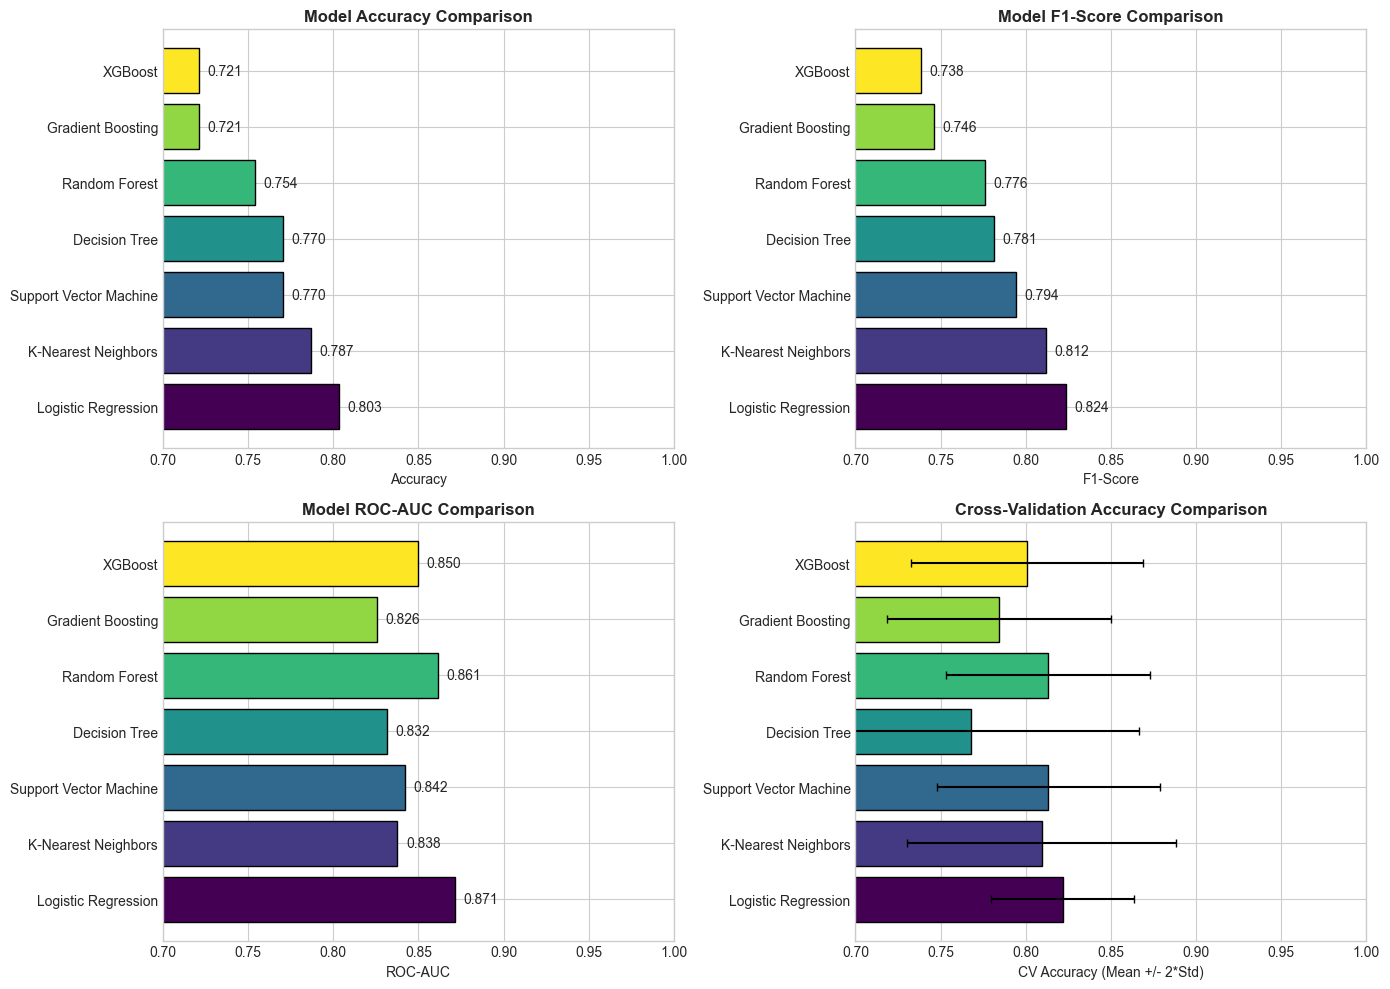

In [60]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy comparison
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))
bars = ax1.barh(results_df['Model'], results_df['Accuracy'], color=colors, edgecolor='black')
ax1.set_xlabel('Accuracy')
ax1.set_title('Model Accuracy Comparison', fontweight='bold')
ax1.set_xlim(0.7, 1.0)
for bar, val in zip(bars, results_df['Accuracy']):
    ax1.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center')

# F1-Score comparison
ax2 = axes[0, 1]
bars = ax2.barh(results_df['Model'], results_df['F1-Score'], color=colors, edgecolor='black')
ax2.set_xlabel('F1-Score')
ax2.set_title('Model F1-Score Comparison', fontweight='bold')
ax2.set_xlim(0.7, 1.0)
for bar, val in zip(bars, results_df['F1-Score']):
    ax2.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center')

# ROC-AUC comparison
ax3 = axes[1, 0]
bars = ax3.barh(results_df['Model'], results_df['ROC-AUC'], color=colors, edgecolor='black')
ax3.set_xlabel('ROC-AUC')
ax3.set_title('Model ROC-AUC Comparison', fontweight='bold')
ax3.set_xlim(0.7, 1.0)
for bar, val in zip(bars, results_df['ROC-AUC']):
    ax3.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center')

# Cross-Validation comparison
ax4 = axes[1, 1]
ax4.barh(results_df['Model'], results_df['CV Mean'], xerr=results_df['CV Std']*2, 
         color=colors, edgecolor='black', capsize=3)
ax4.set_xlabel('CV Accuracy (Mean +/- 2*Std)')
ax4.set_title('Cross-Validation Accuracy Comparison', fontweight='bold')
ax4.set_xlim(0.7, 1.0)

plt.tight_layout()
plt.show()

### ROC Curves Comparison

#### What is an ROC Curve?

ROC (Receiver Operating Characteristic) curve plots:
- **X-axis**: False Positive Rate (FPR) = $\frac{FP}{FP + TN}$
- **Y-axis**: True Positive Rate (TPR) = $\frac{TP}{TP + FN}$ = Recall

#### How to Interpret

- **Perfect classifier**: Goes straight up to (0, 1), then right to (1, 1) → AUC = 1.0
- **Random classifier**: Diagonal line from (0, 0) to (1, 1) → AUC = 0.5
- **Better models**: Curve closer to top-left corner

#### Why ROC-AUC is Useful

1. **Threshold-independent**: Shows performance across all possible thresholds
2. **Class-imbalance robust**: Not affected by imbalanced classes
3. **Interpretable**: AUC = probability that a random positive is ranked higher than a random negative

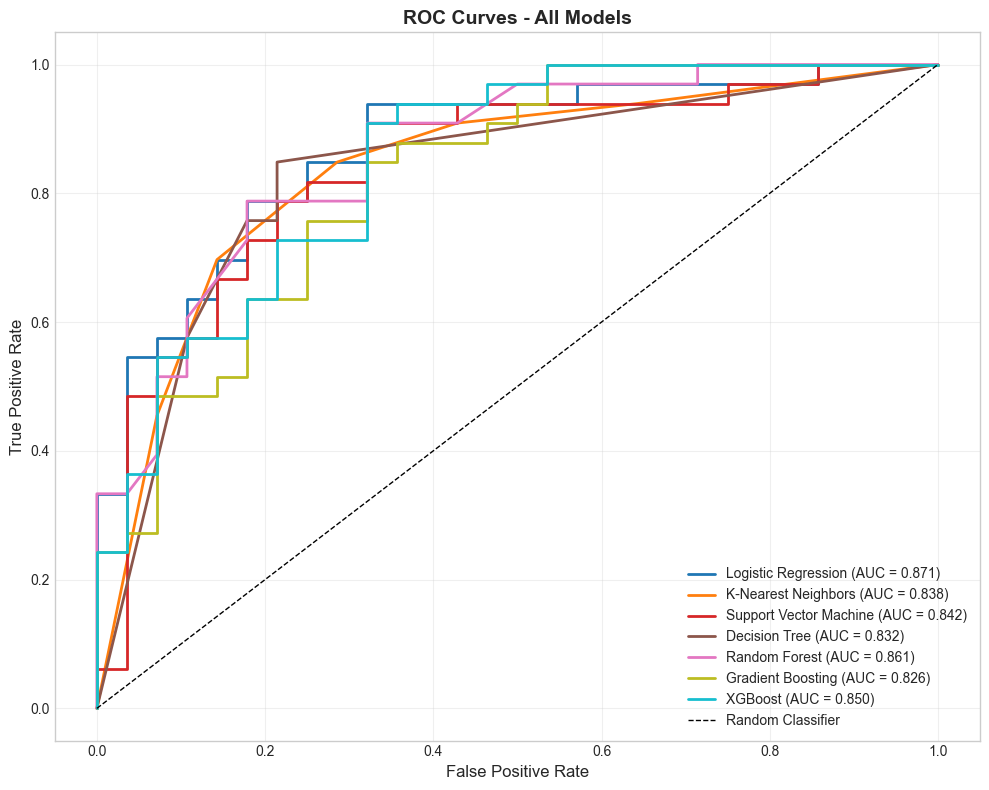

In [61]:
# ROC Curves for all models
plt.figure(figsize=(10, 8))

# Store models and their data for ROC curves
models_for_roc = [
    (lr_model, X_test_scaled, 'Logistic Regression'),
    (knn_model, X_test_scaled, 'K-Nearest Neighbors'),
    (svm_model, X_test_scaled, 'Support Vector Machine'),
    (dt_model, X_test, 'Decision Tree'),
    (rf_model, X_test, 'Random Forest'),
    (gb_model, X_test, 'Gradient Boosting'),
    (xgb_model, X_test, 'XGBoost')
]

colors = plt.cm.tab10(np.linspace(0, 1, len(models_for_roc)))

for (model, X_data, name), color in zip(models_for_roc, colors):
    y_pred_proba = model.predict_proba(X_data)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [62]:
# Identify the best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1-Score']

print("=" * 60)
print("BEST PERFORMING MODEL")
print("=" * 60)
print(f"\nModel: {best_model_name}")
print(f"F1-Score: {best_f1:.4f}")
print(f"\nThis model will be selected for hyperparameter tuning.")

BEST PERFORMING MODEL

Model: Logistic Regression
F1-Score: 0.8235

This model will be selected for hyperparameter tuning.


---
## 6. Best Model Hyperparameter Tuning

### What is Hyperparameter Tuning?

**Parameters** are learned during training (e.g., weights in logistic regression).

**Hyperparameters** are set before training (e.g., number of trees in Random Forest).

Default hyperparameters rarely give the best results. We need to search for optimal values!

### GridSearchCV

Grid Search tries every combination of hyperparameters:

```
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]

Combinations tried:
(50, 3), (50, 5), (50, 7),
(100, 3), (100, 5), (100, 7),
(200, 3), (200, 5), (200, 7)
= 9 combinations
```

**Cross-Validation (CV=5):**

For each combination:
1. Split training data into 5 folds
2. Train on 4 folds, validate on 1
3. Repeat 5 times (each fold as validation once)
4. Average the 5 scores

Total evaluations = 9 combinations × 5 folds = 45 model fits!

### Why Use Cross-Validation?

A single train/validation split might be lucky or unlucky. Cross-validation gives a more reliable estimate of performance by averaging over multiple splits.

In [63]:
# Define parameter grids for different models
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        },
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        },
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    },
    'Support Vector Machine': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        },
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'X_train': X_train,
        'X_test': X_test
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'max_features': ['sqrt', 'log2']
        },
        'X_train': X_train,
        'X_test': X_test
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        },
        'X_train': X_train,
        'X_test': X_test
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        },
        'X_train': X_train,
        'X_test': X_test
    }
}

In [64]:
# Perform GridSearchCV on the best model
if best_model_name in param_grids:
    config = param_grids[best_model_name]
    
    print(f"Performing GridSearchCV on {best_model_name}...")
    print(f"Parameter grid: {config['params']}")
    print("\nThis may take a few minutes...\n")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(config['X_train'], y_train)
    
    print("\n" + "=" * 60)
    print("GRID SEARCH RESULTS")
    print("=" * 60)
    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best CV F1-Score: {grid_search.best_score_:.4f}")
else:
    print(f"No parameter grid defined for {best_model_name}")

Performing GridSearchCV on Logistic Regression...
Parameter grid: {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

This may take a few minutes...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

GRID SEARCH RESULTS

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV F1-Score: 0.8533


### Evaluating the Tuned Model

Now we evaluate the model with the best hyperparameters on our held-out test set. This gives us the final, unbiased estimate of performance.


TUNED LOGISTIC REGRESSION EVALUATION

Test Set Metrics (After Tuning):
  Accuracy:  0.8033
  Precision: 0.8000
  Recall:    0.8485
  F1-Score:  0.8235
  ROC-AUC:   0.8593

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.75      0.78        28
     Disease       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



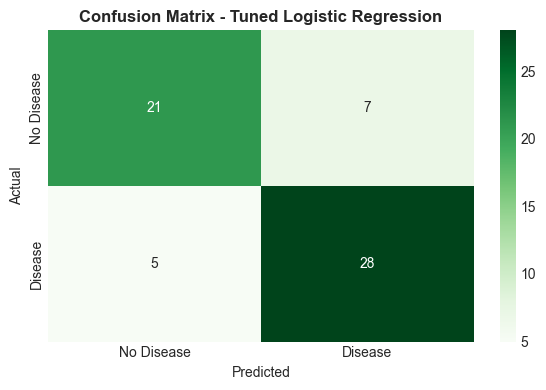

In [65]:
# Evaluate the tuned model
if best_model_name in param_grids:
    config = param_grids[best_model_name]
    tuned_model = grid_search.best_estimator_
    
    print("\n" + "=" * 60)
    print(f"TUNED {best_model_name.upper()} EVALUATION")
    print("=" * 60)
    
    y_pred_tuned = tuned_model.predict(config['X_test'])
    y_pred_proba_tuned = tuned_model.predict_proba(config['X_test'])[:, 1]
    
    print(f"\nTest Set Metrics (After Tuning):")
    print(f"  Accuracy:  {accuracy_score(y_test, y_pred_tuned):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred_tuned):.4f}")
    print(f"  Recall:    {recall_score(y_test, y_pred_tuned):.4f}")
    print(f"  F1-Score:  {f1_score(y_test, y_pred_tuned):.4f}")
    print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")
    
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred_tuned, target_names=['No Disease', 'Disease']))
    
    # Confusion Matrix
    cm_tuned = confusion_matrix(y_test, y_pred_tuned)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - Tuned {best_model_name}', fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

---
## 7. Final Evaluation & Conclusions

### Feature Importance Analysis

Understanding which features are most important helps us:
1. **Interpret the model** - What drives predictions?
2. **Gain domain insights** - What matters clinically?
3. **Feature engineering** - Should we collect more similar features?
4. **Model simplification** - Can we drop unimportant features?

#### How Random Forest Calculates Importance

Random Forest uses **Mean Decrease in Impurity (MDI)**:

$$\text{Importance}(X_j) = \frac{1}{T}\sum_{t=1}^{T}\sum_{\text{node } v \text{ splits on } X_j} p(v) \cdot \Delta\text{Gini}(v)$$

In simpler terms:
- For each feature, sum up how much it reduces Gini impurity across all trees and all splits
- Features that create "purer" splits are more important

FEATURE IMPORTANCE ANALYSIS

Top Features by Importance:
 Feature  Importance
      cp    0.173969
 thalach    0.131634
      ca    0.105700
 oldpeak    0.096577
    thal    0.090418
     age    0.083049
   exang    0.073679
trestbps    0.072088
    chol    0.067384
     sex    0.040229
   slope    0.029811
 restecg    0.024301
     fbs    0.011161


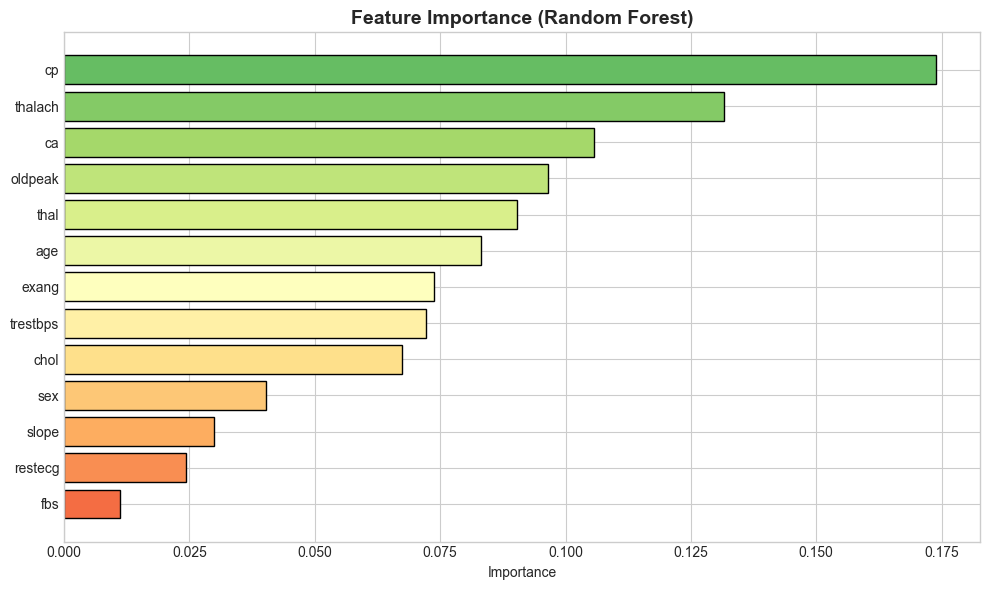

In [66]:
# Feature Importance (for tree-based models)
# Using Random Forest for feature importance visualization

print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature importances from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance)))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors[::-1], edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [67]:
# Final Summary
print("=" * 80)
print("PROJECT SUMMARY")
print("=" * 80)

print(f"""
DATASET:
  - Heart Disease Dataset
  - Samples: {len(df)}
  - Features: {len(X.columns)}
  - Target: Binary (Heart Disease: Yes/No)

MODELS EVALUATED:
  1. Logistic Regression
  2. K-Nearest Neighbors
  3. Support Vector Machine
  4. Decision Tree
  5. Random Forest
  6. Gradient Boosting
  7. XGBoost

BEST MODEL: {best_model_name}
  - F1-Score: {results_df.iloc[0]['F1-Score']:.4f}
  - Accuracy: {results_df.iloc[0]['Accuracy']:.4f}
  - ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f}

TOP 3 IMPORTANT FEATURES:
  1. {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.4f})
  2. {feature_importance.iloc[1]['Feature']} ({feature_importance.iloc[1]['Importance']:.4f})
  3. {feature_importance.iloc[2]['Feature']} ({feature_importance.iloc[2]['Importance']:.4f})

KEY INSIGHTS:
  - [Add your insights about the data and results here]
  - [What patterns did you observe?]
  - [Why do you think certain models performed better?]
""")

PROJECT SUMMARY

DATASET:
  - Heart Disease Dataset
  - Samples: 302
  - Features: 13
  - Target: Binary (Heart Disease: Yes/No)

MODELS EVALUATED:
  1. Logistic Regression
  2. K-Nearest Neighbors
  3. Support Vector Machine
  4. Decision Tree
  5. Random Forest
  6. Gradient Boosting
  7. XGBoost

BEST MODEL: Logistic Regression
  - F1-Score: 0.8235
  - Accuracy: 0.8033
  - ROC-AUC: 0.8712

TOP 3 IMPORTANT FEATURES:
  1. cp (0.1740)
  2. thalach (0.1316)
  3. ca (0.1057)

KEY INSIGHTS:
  - [Add your insights about the data and results here]
  - [What patterns did you observe?]
  - [Why do you think certain models performed better?]



In [68]:
# Display final comparison table
print("\nFINAL MODEL COMPARISON TABLE:")
print("=" * 80)
display(results_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'F1-Score', 'ROC-AUC']))


FINAL MODEL COMPARISON TABLE:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Mean,CV Std
0,Logistic Regression,0.803279,0.800000,0.848485,0.823529,0.871212,0.821599,0.020999
1,K-Nearest Neighbors,0.786885,0.777778,0.848485,0.811594,0.837662,0.809269,0.039564
2,Support Vector Machine,0.770492,0.771429,0.818182,0.794118,0.841991,0.813180,0.032739
3,Decision Tree,0.770492,0.806452,0.757576,0.781250,0.831710,0.767772,0.049214
4,Random Forest,0.754098,0.764706,0.787879,0.776119,0.861472,0.813180,0.029971
5,Gradient Boosting,0.721311,0.735294,0.757576,0.746269,0.825758,0.784354,0.032893
6,XGBoost,0.721311,0.750000,0.727273,0.738462,0.849567,0.800765,0.034166


---
## Your Conclusions

### Instructions: Fill in your observations below!

After running this notebook, write your conclusions:

---

### 1. Best Performing Model

*Which model performed best and why do you think that is?*

[Your answer here]

---

### 2. Key Observations

*What patterns did you notice in the data and results?*

- Observation 1: [Your observation]
- Observation 2: [Your observation]
- Observation 3: [Your observation]

---

### 3. Feature Insights

*Which features were most important? Does this make clinical sense?*

[Your answer here]

---

### 4. Model Recommendations

**For Production (highest accuracy):**
[Your recommendation and reasoning]

**For Interpretability (explainable to doctors):**
[Your recommendation and reasoning]

---

### 5. Future Improvements

*What could be done to improve the results?*

- [ ] Collect more data
- [ ] Try more feature engineering
- [ ] Tune hyperparameters more extensively
- [ ] Try neural networks
- [ ] Address class imbalance (if any)
- [ ] [Your ideas]

---

**Congratulations on completing this project!** You've successfully applied 7 different classification algorithms to a real-world dataset and compared their performance. This is exactly the kind of systematic approach that's valued in data science roles.

---
## Appendix: Algorithm Summary Table

| Algorithm | Type | Key Math | Needs Scaling | Handles Non-Linear | Interpretable |
|-----------|------|----------|---------------|-------------------|---------------|
| **Logistic Regression** | Linear | $\sigma(w^Tx + b)$ | Yes | No | Yes |
| **KNN** | Instance-based | Euclidean distance | Yes | Yes | Medium |
| **SVM** | Margin-based | $\max \frac{2}{\|w\|}$ | Yes | Yes (kernel) | No |
| **Decision Tree** | Rule-based | Gini/Entropy | No | Yes | Yes |
| **Random Forest** | Ensemble (Bagging) | Majority vote | No | Yes | Low |
| **Gradient Boosting** | Ensemble (Boosting) | $F_m = F_{m-1} + \eta h_m$ | No | Yes | Low |
| **XGBoost** | Ensemble (Boosting) | Regularized GB | No | Yes | Low |